In [76]:
def main():
    data_file_name = input('Data file name: ')
    data_type_file_name = input('Column type file name: ')
    df = pd.read_csv('../../data/processed/'+data_file_name+'.csv')
    df_type = pd.read_csv('../../data/processed/'+data_type_file_name+'.csv')
    Logistic_Regression (dataset, dataset_type)

In [85]:
def main():
    data_file_name = input('Data file name: ')
    data_type_file_name = input('Column type file name: ')
    df = pd.read_csv('../../data/processed/'+data_file_name+'.csv')
    df_type = pd.read_csv('../../data/processed/'+data_type_file_name+'.csv')
    Logistic_Regression (dataset, dataset_type)



def Logistic_Regression (dataset, dataset_type, Test_size= 0.2):
    import pandas as pd
    import numpy as np
    from sklearn.linear_model import LogisticRegression
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import metrics
    import pickle
    
    
    print('The current dataset has',dataset.shape[1],'columns and',dataset.shape[0],'rows')
    print('\nColumn names are',dataset.columns)
    print('')
    print('The first 10 rows of this dataset:')
    print(dataset.head(10))
    
    
    # Funtion to get column type
    def column_type(column_name,df_type):
        return (df_type.loc[df_type['Variable'] == column_name, 'Type'].iloc[0])
    
    # Function to get target variable
    def get_target(df,df_type):
        for c in df:
            if (column_type(c,df_type) == 'Flag_Continuous' or column_type(c,df_type) == 'Flag_Categorical'):
                return(c)
            
    # Separate the Train and Test set.      
    target = get_target(dataset,dataset_type)
    X = dataset.drop([target],axis = 1)
    Y = dataset.loc[:,target]
    
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = Test_size, random_state=0)
    
    # Fit the Logistic Regression using train set.
    Logist_R = LogisticRegression(random_state=0, penalty = 'l2',solver='liblinear').fit(x_train, y_train)
    
#     # save the model to disk
#     filename = '../../models/Logistic_Regressor.sav'
#     pickle.dump(Logist_R, open(filename, 'wb'))

    # Use the model to get the predict values
    y_pred = Logist_R.predict(x_test)
    
    # Cross Validation
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(Logist_R, x_train, y_train, cv=10)
    print('')
    print('')
    print('The cross validation accuracy list is',scores,'\n')
    print("The average is Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print('')
    
    # Confusion metrix
    Logist_R_matrix = metrics.confusion_matrix(y_test, y_pred)
    
    sns.heatmap(pd.DataFrame(Logist_R_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    print("The Accuracy of Confusion Matrix is :",round(metrics.accuracy_score(y_test, y_pred),3))
    if dataset[target].dtype == int: 
        print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
        print("Recall:",round(metrics.recall_score(y_test, y_pred),3))


The current dataset has 14 columns and 14112 rows

Column names are Index(['BUS__CODE', 'SCORE', 'A_GrossSales', 'A_ExtaxPurch', 'A_Resales',
       'A_FoodCosts', 'A_LaborCosts', 'A_IOC', 'A_BadDebts', 'A_TOPP',
       'A_SalesFinal', 'OwnCode', 'Status', 'Y_AuditResult'],
      dtype='object')

The first 10 rows of this dataset:
   BUS__CODE     SCORE  A_GrossSales  A_ExtaxPurch  A_Resales  A_FoodCosts  \
0          1  0.190060      0.061679      0.066138   0.056952     0.056386   
1          5  0.190060      0.350000      0.297216   0.234331     0.292740   
2          5  0.190060      0.268717      0.312500   0.345161     0.292740   
3          5  0.190060      0.267081      0.170758   0.345161     0.292740   
4          6  0.220606      0.421769      0.312500   0.909091     0.292740   
5          5  0.190060      0.061679      0.066138   0.056952     0.056386   
6          5  0.190060      0.061679      0.066138   0.056952     0.056386   
7          1  0.190060      0.061679      0

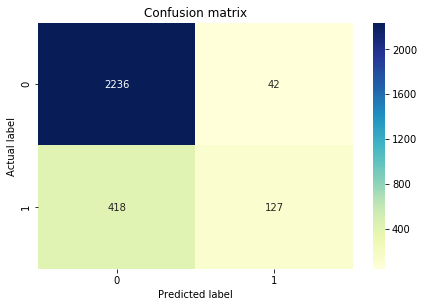

In [86]:
Logistic_Regression(d1,d3)

The current dataset has 15 columns and 14112 rows

Column names are Index(['Case_ID', 'Y_AuditResult', 'SCORE_transformed',
       'A_GrossSales_transformed', 'A_ExtaxPurch_transformed',
       'A_Resales_transformed', 'A_FoodCosts_transformed',
       'A_LaborCosts_transformed', 'A_IOC_transformed',
       'A_BadDebts_transformed', 'A_TOPP_transformed',
       'A_SalesFinal_transformed', 'BUS__CODE_transformed',
       'OwnCode_transformed', 'Status_transformed'],
      dtype='object')

The first 10 rows of this dataset:
     Case_ID Y_AuditResult  SCORE_transformed  A_GrossSales_transformed  \
0  100000001   Not_Success          -0.471958                  0.000000   
1  100000002   Not_Success          -0.729309                 -0.405738   
2  100000003       Success          -0.471958                 -0.390586   
3  100000004   Not_Success          -0.266077                  0.497606   
4  100000005       Success           0.000000                 -0.428499   
5  100000006   Not_Suc

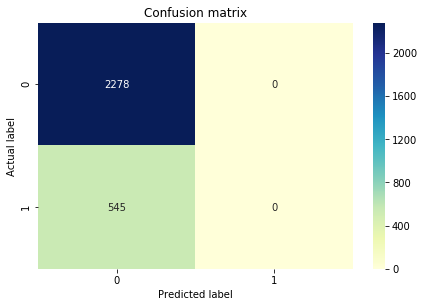

In [84]:
Logistic_Regression(d2,d3)